## Basic Exploratory Data Analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Basic per device metrics and Data Quality

In [6]:
df = pd.read_csv("../data/device_failure.csv")
df.loc[:,'date'] = pd.to_datetime(df['date'])

In [7]:
df.head()

date    device  failure  attribute1  attribute2  attribute3  \
0 2015-01-01  S1F01085        0   215630672          56           0   
1 2015-01-01  S1F0166B        0    61370680           0           3   
2 2015-01-01  S1F01E6Y        0   173295968           0           0   
3 2015-01-01  S1F01JE0        0    79694024           0           0   
4 2015-01-01  S1F01R2B        0   135970480           0           0   

   attribute4  attribute5  attribute6  attribute7  attribute8  attribute9  
0          52           6      407438           0           0           7  
1           0           6      403174           0           0           0  
2           0          12      237394           0           0           0  
3           0           6      410186           0           0           0  
4           0          15      313173           0           0           3

In [10]:
df.isnull().describe()

date  device failure attribute1 attribute2 attribute3 attribute4  \
count  124494  124494  124494     124494     124494     124494     124494   
mean        0       0       0          0          0          0          0   
std         0       0       0          0          0          0          0   
min     False   False   False      False      False      False      False   
25%         0       0       0          0          0          0          0   
50%         0       0       0          0          0          0          0   
75%         0       0       0          0          0          0          0   
max     False   False   False      False      False      False      False   

      attribute5 attribute6 attribute7 attribute8 attribute9  
count     124494     124494     124494     124494     124494  
mean           0          0          0          0          0  
std            0          0          0          0          0  
min        False      False      False      False      False  
25%            0          0          0          0          0  
50%            0          0          0          0          0  
75%            0          0          0          0          0  
max        False      False      False      False      False

In [11]:
df["date"].describe()

count                  124494
unique                    304
top       2015-01-03 00:00:00
freq                     1163
first     2015-01-01 00:00:00
last      2015-11-02 00:00:00
Name: date, dtype: object

### Good. At least no null values

In [9]:
total_obs = df.shape[0]
unique_dev = df.device.unique().shape[0]
print ("Total Observations        : %s"%total_obs)
print ("Unique Devices            : %s"%unique_dev)
print ("Unique devices that failed: %d"%df[df['failure'] == 1].device.unique().size)
print ("Avg number of observations per device: %f"%(float(total_obs)/unique_dev))

Total Observations        : 124494
Unique Devices            : 1168
Unique devices that failed: 106
Avg number of observations per device: 106.587329


### Distribution of number of readings for devices
#### NumDevices/day that were observed --> points to systemic ingestion/sampling problem

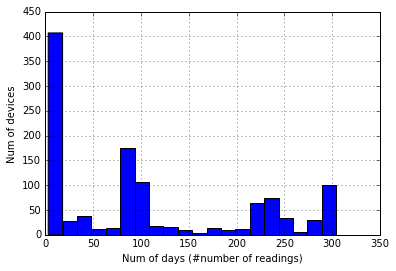

In [15]:
df.groupby(["device"]).count()["attribute1"].hist(bins=20)
plt.xlabel("Num of days (#number of readings)")
plt.ylabel("Num of devices")

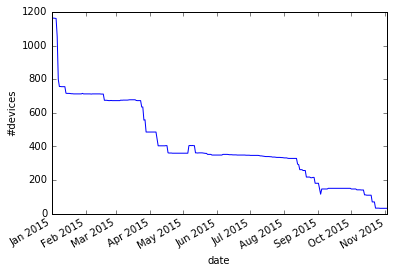

In [16]:
df.groupby(["date"]).count()["device"].plot.line()
plt.ylabel("#devices")

#### See if there are gaps in dates for sensor data. See how bad it is

In [19]:
df_date_min = df.groupby("device").min()["date"]
df_date_max = df.groupby("device").max()["date"]
df_date_count = df.groupby("device").count()["date"]
df2 = pd.concat([df_date_min, df_date_max, df_date_count], axis=1)
df2.columns = ["start", "end", "xcount"]
df2.loc[:,"diff_dates"] = (df2.end - df2.start).dt.days+1
df2.loc[:,'deltas'] = df2.diff_dates - df2.xcount
df2.loc[:,'missing'] = df2.deltas.map(lambda x: x != 0)
df2.groupby("missing").count()["start"]

missing
False    997
True     171
Name: start, dtype: int64

#### At least majority of cases, readings are continuous
##### For missing data, how many days are we missing?

In [21]:
missing = df2[df2["missing"] == True]
missing.loc[:,"miss_pct"] = (missing["deltas"]/missing["diff_dates"])*100
missing.miss_pct.describe()

count    171.000000
mean      27.568382
std       30.822808
min        0.653595
25%        0.701754
50%       15.116279
75%       43.494856
max       93.129771
Name: miss_pct, dtype: float64

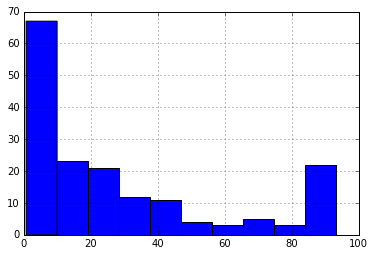

In [22]:
missing.miss_pct.hist()

## Summary
#### We have data issues, but I think we have enough data to get started
#### Work with internal and external operations in parallel